In [1]:
#Importing packages

import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading dataset and displaying the first 5 rows
data = pd.read_csv("C:/Users/KHEMBO/Desktop/Data Science/k means/clustering.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
#Summary statistics 
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


# Target variables
We will be taking only two variables from the data – “LoanAmount” and “ApplicantIncome.” 

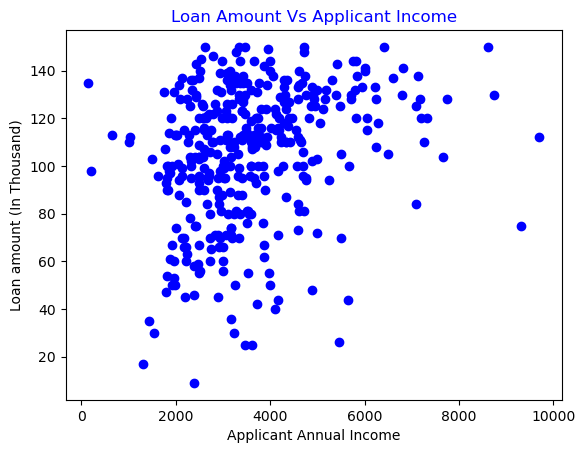

In [4]:
#Pick these two variables and assigning to X
X = data[["LoanAmount","ApplicantIncome"]]

#visualize the data points
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.title("Loan Amount Vs Applicant Income", c="blue")
plt.xlabel("Applicant Annual Income")
plt.ylabel("Loan amount (In Thousand)")
plt.show()

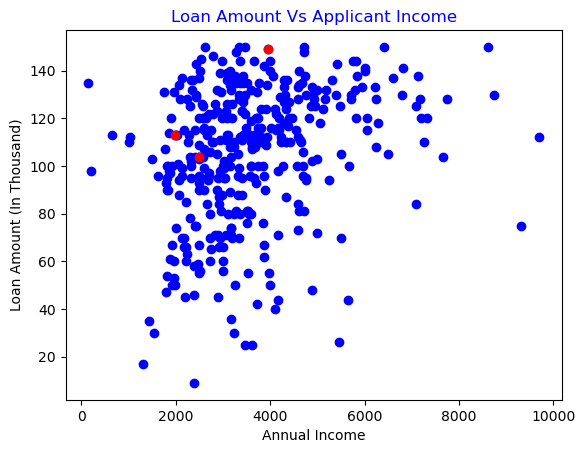

In [5]:
# Choosing the number of clusters (k) and select random centroid for each cluster

#Pick 3 clusters
K = 3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c="red")
plt.title("Loan Amount Vs Applicant Income", c="blue")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount (In Thousand)")
plt.show()

The blue dots represent the 3 centroids for each cluster. Note that we have chosen these points randomly, and hence every time you run this code, you might get different centroids

In [6]:
# Initialize the difference between old and new centroids to 1 (to enter the loop)
difference = 1

# Initialize Iteration counter j to 0
j = 0

while difference != 0:
    X_data = X.copy()  # Making a copy of original data for preservation
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED = []
        for index2, row_d in X_data.iterrows():
            # Calculating the Euclidean distance between each data point and each centroid
            d1 = (row_c["ApplicantIncome"] - row_d["ApplicantIncome"])**2
            d2 = (row_c["LoanAmount"] - row_d["LoanAmount"])**2
            d = np.sqrt(d1 + d2)
            ED.append(d)
        X.loc[:, i] = ED  # Using .loc to set the value in place
        i += 1

    C = []
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        
        # Finding the Nearest Centroid:
        for i in range(K):
            if row[i + 1] < min_dist:
                min_dist = row[i + 1]
                pos = i + 1

        C.append(pos)
    X.loc[:, "Cluster"] = C  # Using .loc to set the value in place

    Centroids_new = X.groupby("Cluster").mean()[["LoanAmount", "ApplicantIncome"]]
    if j == 0:
        difference = 1
        j += 1
    else:
        difference = (Centroids_new["LoanAmount"] - Centroids["LoanAmount"]).sum() + \
                     (Centroids_new["ApplicantIncome"] - Centroids["ApplicantIncome"]).sum()
        print(difference)

    Centroids = Centroids_new.copy()  # Update Centroids with the newly computed centroids


626.6349393537861
634.7531079360506
475.2815336790095
405.10213828119754
197.89683798255695
207.02731030932063
277.68763984371935
244.66095351174067
229.06905235705375
218.24897861156342
107.07928213052429
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


The values of these centroids may vary with each run. In this implementation, we stop the training process when the centroids remain unchanged for two consecutive iterations, which is a common convergence criterion for K-Means clustering. Initially, we set the 'difference' variable to 1. Within the loop, 'difference' is calculated as the disparity between the centroids from the previous iteration and the current one. When this difference is 0, we stop the training

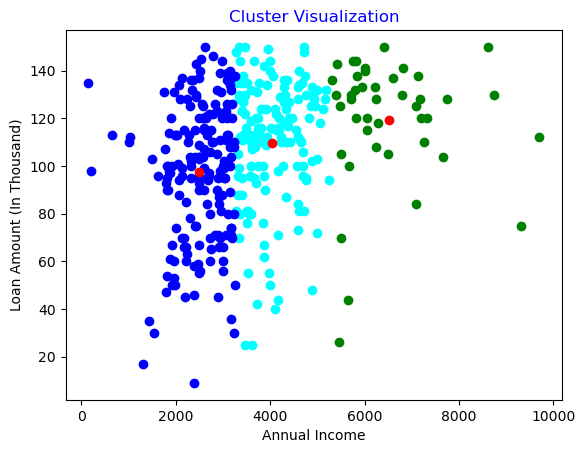

In [7]:
#Visualize the clusters we have got
color = ['cyan', 'green', 'blue']
for k in range(K):
    data = X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"], c = color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"], c = 'red')
plt.title("Cluster Visualization", c="blue")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount (In Thousand)")
plt.show()